<a href="https://colab.research.google.com/github/aseddin/F23_ECE4715/blob/main/1_end_to_end_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Machine Learning Project

This notebook will guide you through two machine learning projects from start to finish, and for both projects, we will follow to the generic project checklist provided below.

## Machine Learning Project Checklist
1. Get the data
2. Look at the data to gain insights
3. Prepare the data for machine learning algorithms
4. Explore different models and select a suitable one
5. Fine-tune your model

In [1]:
# code to set things up

# importing common libraries
import numpy as np
import pandas as pd

# Things related to figures and plots
# make figures look nicer
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


# California Housing Price Prediction Project

The aim of this project is to predict median house values in California districts using various features associated with these districts.

This dataset is derived from the 1990 U.S. census and includes features such as population, median income, house age, among others. The target variable in this dataset is the median house price within a district.

## 1. Get the data

There are many sources for data, the following is a list of some popular open data repositories:
* [OpenML.org](https://www.openml.org/)
* [Kaggle.com](https://www.kaggle.com/datasets)
* [PapersWithCode.com](https://paperswithcode.com/datasets)
* [UCI ML Repository](https://archive.ics.uci.edu/)
* [Amazon's AWS datasets](https://registry.opendata.aws/)
* [TensorFlow Datasets](https://www.tensorflow.org/datasets)

### `sklearn` Dataset loading utilities

`sklearn.datasets` provides 3 kinds of dataset interfaces:
* Loaders: load small standard datasets
* Fetchers: download and load larger datasets
* Generators: generate synthetic datassets

[Click here](https://scikit-learn.org/stable/datasets.html) to read more about these interfaces


### Download the data

You can get this specific dataset using the `fetch_california_housing` function, which is a standard data fetcher included in the `sklearn` library.

In [2]:
from sklearn.datasets import fetch_california_housing

# fetcher returns a Bunch object, setting as_frame=True sets its data key to Pandas DataFrame
skl_housing = fetch_california_housing(as_frame=True)

In [3]:
type(skl_housing)

sklearn.utils._bunch.Bunch

In [4]:
skl_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(skl_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
skl_housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
skl_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
skl_housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

The default dataset consists solely of numerical attributes without any missing data. To achieve a more comprehensive analysis, we will work with a modified version that includes categorical features and incorporates some missing data.

In [9]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## 2. Look at the data to gain insights

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* The `total_bedrooms` feature is missing 20640 - 20433 = 207 values
* The `ocean_proximity` is not numeric


In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


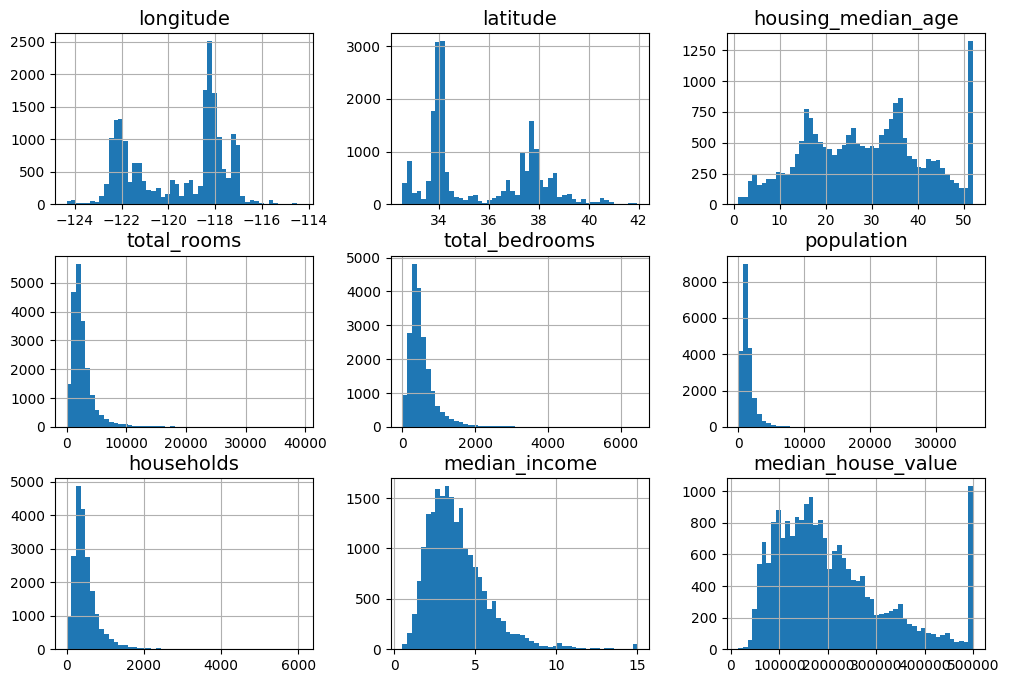

In [14]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

**Comments**

* Median income is not expressed in USD. roughtly tens of thousands.
* Median age and median house value are both capped. Hence, the peak at the far right side.
* The features have different scales


**CREATE A TEST SET BEFORE YOU CONTINUE!**

You can suffle the dataset then split it based on an index. However, `sklearn` provides a few functions that makes the task easier and more robust.

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
# make a copy of the training set to revert to when necessary
housing = train_set.copy()

In [17]:
type(housing)

pandas.core.frame.DataFrame

### Visualizing Geographical Data

The dataset contains geographical information, specifically latitude and longitude data, which can be harnessed to generate visual representations of geographic data.

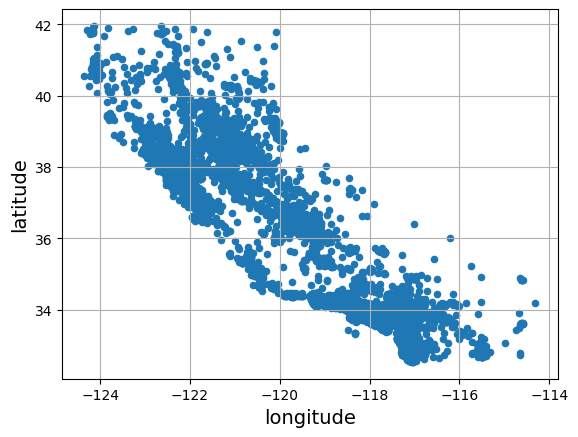

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

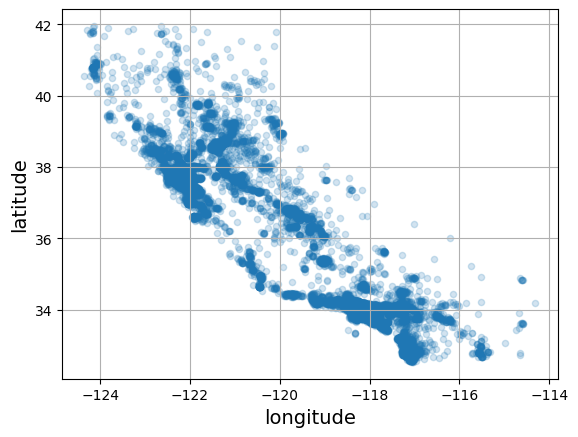

In [19]:
# to see the district density we add alpha
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
               alpha=0.2)
plt.show()

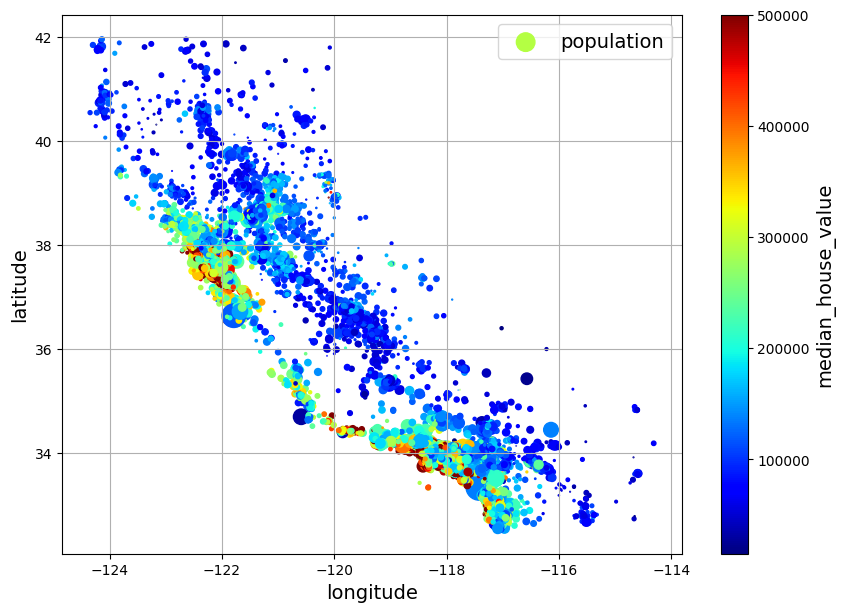

In [20]:
# option s: radius of each circle represent the district's population
# option c: color represent price (low=blue, rid=high)
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
               s=housing["population"] / 100, label="population",
               c="median_house_value", cmap="jet", colorbar=True,
               legend=True, figsize=(10, 7))
plt.show()

It seems that housing price is related to the location and population density (Duh!)

### Correlations

Let's compute the Pearson's correlation coefficient between every pair of features

In [21]:
numeric_attributes = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income',
                      'median_house_value']

corr_matrix = housing[numeric_attributes].corr()

In [22]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [23]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924341,-0.110786,0.043100,0.069439,0.100706,0.056318,-0.014592,-0.043603
latitude,-0.924341,1.000000,0.012640,-0.036327,-0.069283,-0.110514,-0.073915,-0.079259,-0.146324
housing_median_age,-0.110786,0.012640,1.000000,-0.362433,-0.318544,-0.291842,-0.301198,-0.118410,0.104714
total_rooms,0.043100,-0.036327,-0.362433,1.000000,0.928199,0.851766,0.916265,0.197326,0.134060
total_bedrooms,0.069439,-0.069283,-0.318544,0.928199,1.000000,0.873484,0.979627,-0.011782,0.049993
population,0.100706,-0.110514,-0.291842,0.851766,0.873484,1.000000,0.903045,0.000883,-0.025820
households,0.056318,-0.073915,-0.301198,0.916265,0.979627,0.903045,1.000000,0.009366,0.065798
median_income,-0.014592,-0.079259,-0.118410,0.197326,-0.011782,0.000883,0.009366,1.000000,0.687013
median_house_value,-0.043603,-0.146324,0.104714,0.134060,0.049993,-0.025820,0.065798,0.687013,1.000000


Let's look at how each feature correlate with the target (median house value)

In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
population           -0.025820
longitude            -0.043603
latitude             -0.146324
Name: median_house_value, dtype: float64

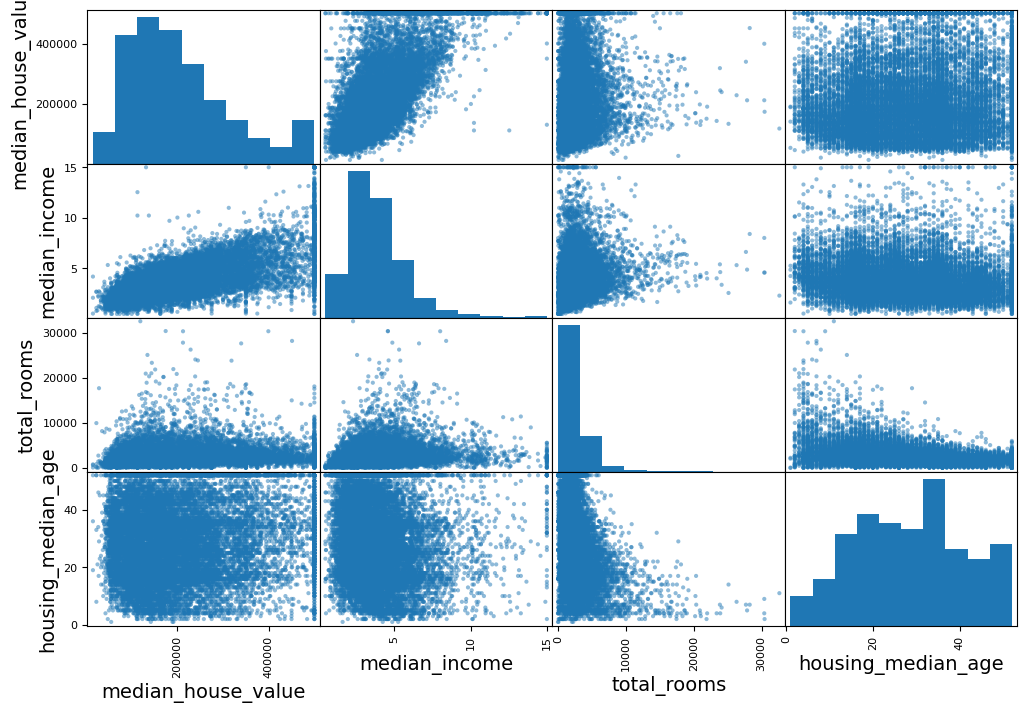

In [25]:
from pandas.plotting import scatter_matrix

# there are too many attributes to plot, we select key attributes
select_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[select_attributes], figsize=(12, 8))
plt.show()

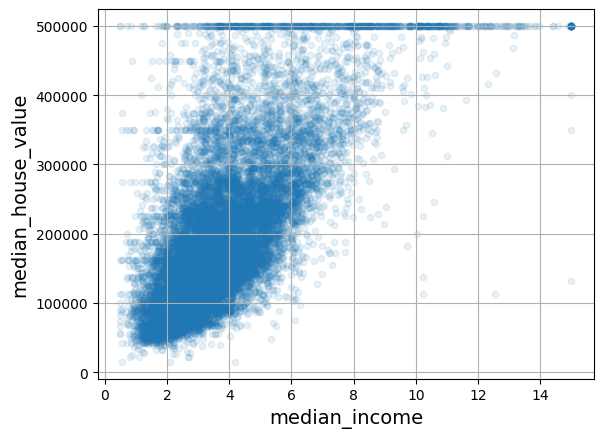

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

### Atribute Combinations

In [27]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [28]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
rooms_per_house       0.146940
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
people_per_house     -0.021577
population           -0.025820
longitude            -0.043603
latitude             -0.146324
bedrooms_ratio       -0.254817
Name: median_house_value, dtype: float64

## 3. Prepare the data for machine learning algorithms

This step should be function-based since it allows for reproducibility with an updated dataset or even the test set.

In [29]:
# revert to a clean version of the training set
housing = train_set.copy()

# separate the attributes from the label
X_train = housing.drop("median_house_value", axis=1) # drop creates a copy of housing without specific feature(s)
y_train = housing["median_house_value"].copy()

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [31]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 16512 entries, 14196 to 15795
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


### Dealing with missing data

Machine learning algorithms do not work well with missing data. There are several approaches to address this issue:
1. Delete samples with missing data (i.e. remove the corresponding housing district)
2. Delete attributes with missing data (i.e. delete the `total_bedrooms` feature)
3. Set all missing values to a specific value (i.e. zero, feature mean, feature median...etc.) (Also known as _imputation_)

`Pandas` can be used to implement these approaches

In [32]:
# find the samples with missing data

null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,NaN,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,NaN,191.0,67.0,1.3897,<1H OCEAN


In [33]:
# Delete samples with missing data
X_train_option1 = X_train.copy()

X_train_option1.dropna(subset=["total_bedrooms"], inplace=True)

X_train_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [34]:
# Delete attributes with missing data
X_train_option2 = X_train.copy()

X_train_option2.drop("total_bedrooms", axis=1, inplace=True)

X_train_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,191.0,67.0,1.3897,<1H OCEAN


In [35]:
# Impute the missing values (i.e. with the median)
X_train_option3 = X_train.copy()

median = X_train_option3["total_bedrooms"].median()
X_train_option3["total_bedrooms"].fillna(median, inplace=True)

X_train_option3[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,437.0,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,437.0,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,437.0,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,437.0,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,437.0,191.0,67.0,1.3897,<1H OCEAN


Option 3 is likely the least destructive as it preserves the original data. Nevertheless, it's advisable to employ `sklearn`'s `SimpleImputer` class rather than `Pandas`. This approach will enable us to retain the imputation value, making it applicable to other datasets, such as the test set or any new data introduced to the model.

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# other strategies are available (i.e. mean, most_frequent, constant...etc.)

As the median is only applicable to numerical features (i.e., it cannot be used on categorical features), we should separate the numerical features.

In [37]:
# drop the ocean_proximity feature
X_train_num = X_train.select_dtypes(include=[np.number])

In [38]:
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

**Note**: In `sklearn`, hyperparameters are directly accessible as public attributes, and learned parameters are also accessible directly as public attributes, with learned parameters typically having an underscore `_` as a suffix.

In [39]:
# hyperparameter
imputer.strategy

'median'

In [40]:
# imputer computed the medians of all features (missing or not)
imputer.statistics_ #learned parameter

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  437.    , 1169.    ,
        411.    ,    3.5246])

In [41]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [42]:
# double check the result using Pandas' median function
X_train_num.median()

longitude             -118.4900
latitude                34.2500
housing_median_age      29.0000
total_rooms           2129.0000
total_bedrooms         437.0000
population            1169.0000
households             411.0000
median_income            3.5246
dtype: float64

In [43]:
# use the imputer to fill the missing data in the numerial dataset
X_train_num_imputed = imputer.transform(X_train_num)

In [44]:
type(X_train_num_imputed)

numpy.ndarray

`SimpleImputer` returns a numpy array. We can convert it back to a Pandas DataFrame

In [45]:
X_train_num_imputed_df = pd.DataFrame(X_train_num_imputed, columns=X_train_num.columns, index=X_train_num.index)

In [46]:
X_train_num_imputed_df.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9529,-118.31,33.94,40.0,1550.0,437.0,798.0,270.0,3.7750
16519,-117.86,34.01,16.0,4632.0,437.0,3038.0,727.0,5.1762
19782,-119.75,34.45,6.0,2864.0,437.0,1404.0,603.0,5.5073
1343,-120.32,37.29,38.0,576.0,437.0,478.0,112.0,2.3382
9827,-121.85,36.61,38.0,238.0,437.0,191.0,67.0,1.3897


### Handling text and categorical attributes

Machine learning algorithms are generally designed to operate with numerical features, necessitating the conversion of textual or categorical data into numerical representations.

There are multiple approaches to address categorical attributes, and we will examine two of them.

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.8+ MB


`ocean_proximity` is a categorical attributes

In [48]:
X_train_cat = X_train[["ocean_proximity"]]
X_train_cat.head()

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR BAY
14265,<1H OCEAN
2271,INLAND


In [49]:
X_train_cat.value_counts()

ocean_proximity
<1H OCEAN          7313
INLAND             5276
NEAR OCEAN         2091
NEAR BAY           1827
ISLAND                5
dtype: int64

#### Ordinal encoding

Assign a number to each category

In [50]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)

In [51]:
X_train_cat_encoded

array([[4.],
       [4.],
       [3.],
       ...,
       [1.],
       [1.],
       [0.]])

In [52]:
np.unique(X_train_cat_encoded, return_counts=True)

(array([0., 1., 2., 3., 4.]), array([7313, 5276,    5, 1827, 2091]))

In [53]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In cases where the feature represent unordered categories, as is the case in this dataset, the numerical values do not necessarily correspond to the concept of similarity. In other words, categories 0 and 1 may not inherently imply similarity. With this type of encoding, certain machine learning algorithms might mistakenly infer similarity based solely on the numerical category values.

There are some categorical features (i.e. excellent, good, average, bad) where ordered encoding is OK and ordinal encoding is appropriate.

#### One hot encoding

Convert each categorical attribute into a set of binary features, where one of the new features will be marked as '1,' and the others will be set to '0,' depending on the specific category it represents.

In [54]:
from sklearn.preprocessing import OneHotEncoder

hot_encoder = OneHotEncoder()
X_train_cat_1hot = hot_encoder.fit_transform(X_train_cat)

In [55]:
X_train_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [56]:
X_train_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [57]:
# you can force the OneHotEncoder to return a dense numpy array
hot_encoder = OneHotEncoder(sparse_output=False)
X_train_cat_1hot = hot_encoder.fit_transform(X_train_cat)
X_train_cat_1hot

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

When employing a `DataFrame` as input for `sklearn` estimators, the column names are preserved within `feature_names_in_`. These names are retained for future comparisons with subsequent `DataFrame` inputs, such as those encountered during the use of `transform()` or `predict()`. Additionally, they can be utilized to facilitate the reconstruction of another `DataFrame`.

In [58]:
hot_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [59]:
hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [60]:
# transformers can generate new names from the categories to build another DataFrame
hot_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [61]:
X_train_cat_1hot_df = pd.DataFrame(X_train_cat_1hot,
                     columns=hot_encoder.get_feature_names_out(),
                     index=X_train_cat.index)

X_train_cat_1hot_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,0.0,0.0,0.0,0.0,1.0
8267,0.0,0.0,0.0,0.0,1.0
17445,0.0,0.0,0.0,1.0,0.0
14265,1.0,0.0,0.0,0.0,0.0
2271,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
11284,0.0,0.0,0.0,1.0,0.0
11964,1.0,0.0,0.0,0.0,0.0
5390,0.0,1.0,0.0,0.0,0.0
860,0.0,1.0,0.0,0.0,0.0


### Feature scaling

In general, machine learning algorithms perform optimally when the input features are on the same scale. Feature scaling is a technique that aligns all features to the same scale. Failing to scale the features can result in models showing a bias towards those with larger numerical values.


#### Min-Max scaling (Normalization)

A linear transformation that scales each of the input features to the range $[0, 1]$

$$
x_{scaled} = \frac{x - min}{max-min}
$$

* $x$ is the unscaled input feature
* $min$ is the minimum value of $x$ (typically from the training set)
* $max$ is the maximum value of $x$ (typically from the training set)
* $x_{scaled}$ is the scaled feature (a number between 0 and 1)

The equation above can be modified slightly to accomodate ranges other than $[0, 1]$

In [62]:
from sklearn.preprocessing import MinMaxScaler

# default range is [0, 1]; feature_range changes it
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_num_min_max_scaled = min_max_scaler.fit_transform(X_train_num_imputed)

In [63]:
X_train_num_min_max_scaled.min(axis=0)

array([-1., -1., -1., -1., -1., -1., -1., -1.])

In [64]:
X_train_num_min_max_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

#### Standard Scaling (Standardization)

$$
z = \frac{x - \mu}{\sigma}
$$

* $x$ is the unscaled input feature
* $\mu$ is the mean of $x$ (typically from the training set)
* $\sigma$ is the standard deviation of $x$ (typically from the training set)
* $z$ is the scaled feature (a number with mean 0 and standard deviation of 1)

The values are not restricted to a range (i.e. $[0, 1]$)

This scaler is more robust to outliers when compared to normalization. For instance, if the majority of the values fall within the range of $[0, 10]$, and there is an outlier with a value of $100$, normalization would compress the values within the $[0, 10]$ range into a much narrower interval.

In [65]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_num_std_scaled = std_scaler.fit_transform(X_train_num_imputed)

In [66]:
X_train_num_std_scaled.min(axis=0)

array([-2.39332274, -1.44883981, -2.18677709, -1.22897202, -1.28991372,
       -1.25671178, -1.31639929, -1.76354428])

In [67]:
X_train_num_std_scaled.max(axis=0)

array([ 2.62853003,  2.96153527,  1.85507271, 13.99600226, 14.19143585,
       30.20598701, 14.71737909,  5.8387555 ])

### Transformation Pipelines

Pipelines enable us to streamline machine learning workflows, when it comes to data preprocessing,  they facilitate the execution of multiple transformations in a predefined order.

In [68]:
# revert to a clean version of the training set
housing = train_set.copy()

# separate the attributes from the label
X_train = housing.drop("median_house_value", axis=1) # drop creates a copy of housing without specific feature(s)
y_train = housing["median_house_value"].copy()

X_train_num = X_train.select_dtypes(include=[np.number])
X_train_cat = X_train[["ocean_proximity"]]


In [69]:
# this will generate interactive diagrams for estimators and pipelines
from sklearn import set_config
set_config(display="diagram")

In [70]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

We can specify the name of each step in the pipeline. This will be helpful later when we are fine tuning the model.

In [71]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

 The `Pipeline` constructor expects a list of tuples, each containing a name and a transformer.

 --------

It's essential to highlight that the estimators at all steps need to be trasnformers except the final estimator, which is not required to be a transformer, meaning it doesn't need to have a `transform()` method. Furthermore, the final estimator's methods are usually made accessible through the `pipeline`. For instance, if the last step happens to be a predictor, the pipeline will expose a `predict()` function.

When you call the `fit()` method of the pipeline, it systematically executes the `fit_transform()` method for all transformers, passing the output of each to the next one until it reaches the final estimator. At that point, it directly invokes the `fit()` method without any transformation steps. The same applies if you call the `predict()` method when the pipeline expose it (i.e. it applies `fit_transform()` to the all steps except the last where it applies `predict()`).

In [72]:
X_train_num_prepared = num_pipeline.fit_transform(X_train_num)

In [73]:
X_train_num.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648


In [74]:
X_train_num_prepared[:2].round(2)

array([[ 1.17, -1.35,  0.43,  1.57,  1.38,  1.08,  1.51,  0.38],
       [ 1.27, -1.38, -1.47, -0.81, -0.9 , -0.64, -0.88,  0.42]])

In [75]:
df_X_train_num_prepared = pd.DataFrame(
    X_train_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=X_train_num.index
)

df_X_train_num_prepared.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,1.172993,-1.350415,0.428537,1.570557,1.376799,1.081011,1.507507,0.379698
8267,1.268028,-1.378536,-1.473509,-0.809439,-0.900718,-0.643842,-0.878707,0.420068


In [76]:
# pipelines support indexing
num_pipeline[0]

SimpleImputer(strategy='median')

In [77]:
# pipelines steps cal also be accessed using the named steps
num_pipeline["impute"]

SimpleImputer(strategy='median')

In [78]:
# create a pipeline for categorical data
cat_pipeline = Pipeline([
    ("cat_impute", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

We can combine the numerical and categorical pipelines

In [79]:
from sklearn.compose import ColumnTransformer

num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
               'total_bedrooms', 'population', 'households', 'median_income']

cat_attribs = ['ocean_proximity']

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

Similar to `Pipeline`, the `ColumnTransformer` constructor expects a list of 3-tuples, each including a name, a transformer, and a list of names (or indices) of columns to which that specific transformer should be applied.

Instead of using a transformer, `drop` will drop columns and `passthrough` will pass them without transforming them.

In [80]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [81]:
# we can avoid naming the features by using make_column_transformer, and make_column_selector

from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

like `make_pipeline`, `make_column_transformer` does not need names for the transformers

In [82]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7dc08bb11c90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7dc08bacf3d0>)])

In [83]:
X_train_prepared = preprocessing.fit_transform(X_train)

In [84]:
X_train_prepared[:2].round(2)

array([[ 1.17, -1.35,  0.43,  1.57,  1.38,  1.08,  1.51,  0.38,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ],
       [ 1.27, -1.38, -1.47, -0.81, -0.9 , -0.64, -0.88,  0.42,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ]])

In [85]:
# convert the preprocessed training set to DataFrame
df_X_train_prepared = pd.DataFrame(X_train_prepared,
                                   columns=preprocessing.get_feature_names_out(),
                                   index=X_train.index)

df_X_train_prepared.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
14196,1.172993,-1.350415,0.428537,1.570557,1.376799,1.081011,1.507507,0.379698,0.0,0.0,0.0,0.0,1.0
8267,1.268028,-1.378536,-1.473509,-0.809439,-0.900718,-0.643842,-0.878707,0.420068,0.0,0.0,0.0,0.0,1.0


Let's make the final pipeline that includes newly added data

In [86]:
from sklearn.preprocessing import FunctionTransformer

# the following 3 functions will be used to create the 3 new features
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

# for positively valued features with heavy tail on the right
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", "passthrough", ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [87]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7dc0896e5e10>,
                                                                      func=<function column_ratio...
                                                  StandardScaler())]),
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', 'passthrough',
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('cat_impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7dc0896a46d0>)])

In [88]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_train_prepared.shape

(16512, 16)

In [89]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__latitude', 'geo__longitude',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__housing_median_age'],
      dtype=object)

## 4. Explore different models and select a suitable one

In this step, you should train several quick-and-dirty models from various categories using default parameters. Next, evaluate the performance of these different models using N-Fold cross-validation. Compare the models and choose the most suitable one. You may need to repeat these steps iteratively until you achieve satisfactory results.

In [90]:
# revert to a clean version of the training set
housing = train_set.copy()

# separate the attributes from the label
X_train = housing.drop("median_house_value", axis=1) # drop creates a copy of housing without specific feature(s)
y_train = housing["median_house_value"].copy()

In [91]:
# Training a linear regression model

from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7dc...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('geo', 'passthrough',
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7dc0896a46d0>)])),
                ('linearregression', LinearRegression())])

In [92]:
housing_predictions = lin_reg.predict(X_train)
housing_predictions[:5].round() # numpy array

array([290027., 211655., 270948., 272376.,  21929.])

In [93]:
y_train[:5].values # Pandas Series (actual values)

array([291000., 156100., 353900., 241200.,  53800.])

In [94]:
error_ratio = ((housing_predictions - y_train) / y_train).values
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratio[:5]]))

-0.3%, 35.6%, -23.4%, 12.9%, -59.2%


We should employ specific metrics to compare the prediction results with the actual labels or targets, rather than relying solely on visual inspection of the differences.

In regression problems, the Root Mean Square Error (RMSE) is usually a solid initial metric to gauge performance.

In [95]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(y_train, housing_predictions,
                              squared=False) # squared=False generate the Root
lin_rmse

70908.74327973358

In [96]:
y_train.describe()

count     16512.000000
mean     206111.152980
std      114790.075691
min       14999.000000
25%      119400.000000
50%      179200.000000
75%      263800.000000
max      500001.000000
Name: median_house_value, dtype: float64

The average house price is about 206,000 and the RMSE is about 71,000 so the model is not performing very good. The model is underfitting the training data and we propbably need more powerful model, less regularization, or better features.

Let's try a more powerful model.

In [97]:
# Training a Descision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7dc...
                                                   'households',
                                                   'median_income']),
                                                 ('geo', 'passthrough',
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7dc0896a46d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [98]:
housing_predictions = tree_reg.predict(X_train)
tree_rmse = mean_squared_error(y_train, housing_predictions, squared=False) # squared=False generate the root
tree_rmse

0.0

No errors detected! The model is likely overfitting the training data. Since we're not yet prepared to test the model, we cannot utilize the test set. Instead, we should validate the model using a portion of the training set.

### Evaluation Using Cross-Validation

We can use `cross_val_score` to compute the _k-fold cross validation_

In [99]:
# Recall the RMSE of the trained models on the training set
print("Linear Regression RMSE:", lin_rmse)
print("Decision Tree Regressor RMSE:", tree_rmse)

Linear Regression RMSE: 70908.74327973358
Decision Tree Regressor RMSE: 0.0


In [100]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(
    tree_reg, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=10,
    n_jobs=-1
)

`cross_val_score` expects a utility function that follows the principle of **"greater is better"** rather than a cost function where **"lower is better."** This is why we employed the negative RMSE for scoring and utilized the `-` operator to reverse the sign of the output scores.

In [101]:
tree_rmses

array([68246.33056886, 70623.98629702, 69657.90546732, 67171.04664306,
       70500.55480654, 66585.50598798, 70697.16866821, 70110.49385471,
       71054.51599248, 67972.36313839])

In [102]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     69261.987142
std       1625.114837
min      66585.505988
25%      68040.854996
50%      69884.199661
75%      70593.128424
max      71054.515992
dtype: float64

The Decision Tree Regressor did not perform as well as when it was tested on the training set. Cross-validation enabled us to estimate the model's performance and provided insight into the reliability of this estimate by considering the standard deviation. However, it's important to note that obtaining these estimates required training the model multiple times, as we did in our previous code (10 times).

In [103]:
# Compute the cross validation scores for the linear regression model

lin_rmses = -cross_val_score(
    lin_reg, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=10,
    n_jobs=-1
)

pd.Series(lin_rmses).describe()

count       10.000000
mean     72720.123784
std       5336.834714
min      69391.002069
25%      70279.324543
50%      70951.681936
75%      72200.778126
max      87417.224016
dtype: float64

The Decision Tree model appears to have a slight edge in performance. Nonetheless, it's evident that the Decision Tree is significantly overfitting the training set, as indicated by a training RMSE of 0 and a larger validation RMSE. To mitigate this overfitting problem, we could explore the possibility of employing a more complex model.

In [104]:
# This cell will take some time to run
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(
    forest_reg, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=10,
    n_jobs=-1
)

In [105]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     49488.378790
std        918.404825
min      48356.196951
25%      48927.669727
50%      49438.966766
75%      49940.700071
max      51452.667493
dtype: float64

In [106]:
forest_reg.fit(X_train, y_train)
housing_predictiosn = forest_reg.predict(X_train)
forest_rmse = mean_squared_error(y_train, housing_predictions,
                                 squared=False)
forest_rmse

0.0

The Random Forest outperforms the preceding models. Nevertheless, the training error remains significantly lower than the validation error, signaling clear evidence of overfitting on the training set.

## 5. Fine-tune your model

The previous step allowed us to explore several models. After narrowing down our options to a shortlist of promising models, we can fine-tune them by adjusting their hyperparameters.

We can manually test various combinations of hyperparameters, but `sklearn` provides an automated way to streamline this process.


### Grid Search

In [107]:
# create a full pipeline for the random forest
# this is the same as the previous forest_reg
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7dc0896...
                                                   'households',
                                                   'median_income']),
                                                 ('geo', 'passthrough',
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7dc0896a46d0>)])),
                ('random_forest', RandomForestRegressor(random_state=42))])

In [108]:
# Print the names of each step to help us build a parameter grid
print(full_pipeline)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7dc0896...
                                                   'households',
                                                   'median_income']),
            

In [109]:
# This cell will take some time to run

from sklearn.model_selection import GridSearchCV

# dictionary of hyperparameters and values to test
param_grid = [
    {'preprocessing__bedrooms__simpleimputer__strategy': ['median', 'mean'],
     'preprocessing__geo': ['drop', 'passthrough'],
     'random_forest__max_features': [4, 6, 8]},

    {'preprocessing__bedrooms__simpleimputer__strategy': ['median', 'most_frequent'],
     'random_forest__max_features': [6, 8, 10]},

]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'preprocessing__bedrooms__simpleimputer__strategy': ['median',
                                                                               'mean'],
                          'preprocessing__geo': ['drop', 'passthrough'],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__bedrooms__simpleimputer__strategy': ['median',
                                                                               'most_frequent'],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

You can access any hyperparameter of any estimator in the pipeline, regardless of how deeply nested it is, by using double underscores `__`. For example, you can obtain the `SimpleImputer` strategy for the bedrooms ratio using `preprocessing__bedrooms__simpleimputer__strategy`.

In the previous code cell, the `param_grid` contains 2 dictionaries, the first will compute 2x2x3=12 combinations and the second will compute 2x3=6 combinations. So the total combinations is 12+6=18 and each will be fitted 3 times (since we are using cross validation with 3 folds) so the total trained estimators will be 18x3=54 rounds of trainings>

In [110]:
# list of all available hyperparameters
full_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__simpleimputer__verbose', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose'

In [111]:
# The best hyperparameter combination
grid_search.best_params_

{'preprocessing__bedrooms__simpleimputer__strategy': 'mean',
 'preprocessing__geo': 'passthrough',
 'random_forest__max_features': 6}

In [112]:
grid_search.cv_results_

{'mean_fit_time': array([ 5.93602427,  7.96871885, 11.64277196,  6.0799485 ,  8.40972654,
        10.50582012,  5.62145289,  8.55613287, 10.55498036,  5.84689919,
         8.32124543, 10.68096693,  7.95208255, 10.79915746, 12.86471359,
         8.32258002, 11.40178498, 12.85553424]),
 'std_fit_time': array([0.64119655, 0.66720062, 0.7132659 , 0.54230197, 0.62111561,
        0.53304417, 0.42834759, 0.43178346, 0.39566518, 0.78773132,
        0.77503979, 0.3459055 , 0.62615898, 0.03149046, 0.02121565,
        0.74989535, 0.81634246, 1.17885934]),
 'mean_score_time': array([0.23275661, 0.28384527, 0.29039749, 0.27136485, 0.21054697,
        0.28428284, 0.22261874, 0.27306843, 0.21072197, 0.20658056,
        0.21440514, 0.28745055, 0.25257945, 0.20815063, 0.2109855 ,
        0.20356409, 0.26246945, 0.2913065 ]),
 'std_score_time': array([0.01968847, 0.11220272, 0.11521901, 0.08565651, 0.00635336,
        0.1033534 , 0.01269458, 0.08985835, 0.00315173, 0.00243892,
        0.00969328, 0.1060

We can look at a formatted version of this output by putting the results in a Pandas DataFrame

In [113]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# just keep the relevant columns
cv_res = cv_res[[
    "param_preprocessing__bedrooms__simpleimputer__strategy",
    "param_preprocessing__geo",
    "param_random_forest__max_features",
    "split0_test_score",
    "split1_test_score",
    "split2_test_score",
    "mean_test_score"
]]

# rename the columns
scores_cols = [
    "split0",
    "split1",
    "split2",
    "mean_test_rmse"
]
cv_res.columns = ["imputer_strategy", "geographical_location", "max_features"] + scores_cols

# flip the sign of the rmse and round
cv_res[scores_cols] = -cv_res[scores_cols].round().astype(np.int64)

cv_res

,imputer_strategy,geographical_location,max_features,split0,split1,split2,mean_test_rmse
10,mean,passthrough,6,49187,49724,49103,49338
15,most_frequent,NaN,6,49275,49448,49334,49352
11,mean,passthrough,8,49371,49406,49431,49403
5,median,passthrough,8,49510,49426,49376,49437
13,median,NaN,8,49510,49426,49376,49437
4,median,passthrough,6,49403,49633,49291,49442
12,median,NaN,6,49403,49633,49291,49442
16,most_frequent,NaN,8,49483,49450,49514,49482
9,mean,passthrough,4,49386,49784,49518,49563
17,most_frequent,NaN,10,49651,49748,49855,49751


In [114]:
# get the best performing estimator
print(grid_search.best_estimator_)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7dc0896e5e10>,
                                                                                       func=<func...
                                                   'median_

### Randomized Search

Explore the hyperparameter search space by employing a random assortment of parameter combinations. For each hyperparameter, you are required to provide either a list containing potential values or a probability distribution.



In [115]:
# This cell will take some time to run

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__bedrooms__simpleimputer__strategy': ['median', 'mean', 'most_frequent'],
    'preprocessing__geo': ['drop', 'passthrough'],
    'random_forest__max_features': randint(4, 25)
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42,
    n_jobs=-1
)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                              RandomForestRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'preprocessing__bedrooms__simpleimputer__strategy': ['median',
                                                                                             'mean',
                                                                                             'most_frequent'],
                                        'preprocessing__geo': ['drop',
                                                               'passthrough'],
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc08718e500>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [116]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# just keep the relevant columns
cv_res = cv_res[[
    "param_preprocessing__bedrooms__simpleimputer__strategy",
    "param_preprocessing__geo",
    "param_random_forest__max_features",
    "split0_test_score",
    "split1_test_score",
    "split2_test_score",
    "mean_test_score"
]]

# rename the columns
scores_cols = [
    "split0",
    "split1",
    "split2",
    "mean_test_rmse"
]
cv_res.columns = ["imputer_strategy", "geographical_location", "max_features"] + scores_cols

# flip the sign of the rmse and round
cv_res[scores_cols] = -cv_res[scores_cols].round().astype(np.int64)

cv_res

,imputer_strategy,geographical_location,max_features,split0,split1,split2,mean_test_rmse
7,mean,passthrough,5,49225,49756,49510,49497
4,median,passthrough,11,49729,49761,49775,49755
6,mean,passthrough,15,50398,50316,50557,50424
9,mean,passthrough,15,50398,50316,50557,50424
0,most_frequent,passthrough,18,50490,50409,50645,50515
1,most_frequent,passthrough,24,50490,50409,50645,50515
2,most_frequent,passthrough,22,50490,50409,50645,50515
5,most_frequent,passthrough,24,50490,50409,50645,50515
3,most_frequent,drop,14,59284,59131,58411,58942
8,median,drop,15,59377,59113,58511,59000


In [117]:
# The best hyperparameter combination
rnd_search.best_params_

{'preprocessing__bedrooms__simpleimputer__strategy': 'mean',
 'preprocessing__geo': 'passthrough',
 'random_forest__max_features': 5}

## Evaluate the model on the test set

In [118]:
final_model = rnd_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

y_test_predict = final_model.predict(X_test)

test_rmse = mean_squared_error(y_test, y_test_predict, squared=False)
print(test_rmse)

49458.55391403615


--------
# Exercises

## 1. Iris Plants Project
By now, you should have gained a solid grasp of the machine learning project workflow. To put these steps into practice, follow them using the Iris flower dataset as an illustration. This dataset comprises three distinct categories of flowers, and your objective is to build a classification model capable of accurately identifying and categorizing them.

As a reminder, here is the recommended Machine Learning Project Checklist:

1. Get the data
2. Look at the data to gain insights
3. Prepare the data for machine learning algorithms
4. Explore different models and select a suitable one
5. Fine-tune your model

In the upcoming code cells, I've nearly finished the first step (1. Get the data). Your task is to create a test set and proceed with the remaining steps.

In [119]:
from sklearn.datasets import load_iris
# setting as_frame to True makes data and target as pandas DataFrame/Series
# returned value is still Bunch
iris = load_iris(as_frame=True)

In [120]:
# Describe the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [121]:
X = iris.data
y = iris.target